In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/Users/phuongthao/Downloads/edtech_data.csv')

In [4]:
df.head(20)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True
5,2b7c099c4a2956fc8b7016cdd46ffd66,29b402447fcd38dbf82bfc4e6eb688c2,NaN,NaN,Windows,NaN,NaN,7.0,53.500000,2,False,Unknown,True,NaN,0,2020-09-07 14:48,2020-04-20 11:43,NaN,False
6,edcf4726c2ecb3df841695bd06d66dd5,b32f35fb1ae7dded46850bd7408677d3,NaN,NaN,Windows,NaN,NaN,7.0,89.500000,6,False,Unknown,True,NaN,0,2020-08-24 12:47,2020-04-27 19:52,NaN,True
7,b62d3125666944565f2c07c9f4d2898d,b86146dce6ff55738f61fa9ce3b4f204,NaN,NaN,Windows,Earlier,NaN,4.0,100.000000,1,False,Unknown,True,NaN,0,2020-06-22 15:52,2020-05-22 08:35,Saint Petersburg,True
8,e577b491bf8d8dbe1a9847f3cf2265f4,71aa7a417f968238fbe8b09613e29a37,NaN,NaN,Android,I am doing now,Finance,8.0,73.000000,2,False,Unknown,True,NaN,1,2020-06-19 13:43,2020-06-04 13:38,Moscow,True
9,80c26263613b58e6b84b0aea11da5d30,a2699301a3335a8a8b807f5f0238e9f7,2020-08-13 10:28,NaN,Android,NaN,NaN,5.0,92.000000,2,False,Unknown,True,NaN,0,2020-08-06 17:19,2020-04-23 09:34,NaN,True


### Clean data 
1. Deal with missing data 
2. Turn categorical to numerical or not?
3. data type
4. Duplicate

In [6]:
# Missing data table 
total =df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data =pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
nps_score,124242,0.997791
first_payment_date,123596,0.992603
region,112375,0.902487
first_trial_appointment_date,103860,0.834103
job,85909,0.689938
tutor,75820,0.608913
average_score,3017,0.024230
task_class,1305,0.010480
os,16,0.000128
client_id,0,0.000000


There are 9 columns have missing values. Drop missing values of average_score and task_class and keep, assign value for other

In [20]:
df[['average_score','task_class']].dropna(inplace=True)

,average_score,task_class
0,80.222222,6.0
1,98.250000,11.0
2,68.000000,5.0
3,78.571429,7.0
4,92.000000,6.0
...,...,...
124512,90.800000,8.0
124513,81.000000,9.0
124514,80.000000,8.0
124515,56.000000,8.0


In [ ]:
df[['tutor']].replace(np.nan, "No answer")

In [ ]:
df[['region']].replace(np.nan, "No answer")

In [ ]:
df[['job']].replace(np.nan, "No answer")

In [7]:
df.head()

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


In [30]:
df.value_counts('region')

region
Moscow                       4462
Saint Petersburg             2895
Moscow Region                 866
Sverdlovsk Region             677
Samara Region                 439
Republic of Bashkortostan     404
Novosibirsk Region            387
Krasnoyarsk Territory         362
Republic of Tatarstan         263
Rostov Region                 253
Nizhny Novgorod Region        220
Omsk Region                   201
Volgograd Region              189
Chelyabinsk Region            182
Voronezh Region               152
Perm Territory                142
Krasnodar Territory            22
Leningrad Region                8
Tula Region                     2
Kemerovo Region                 2
Amur Region                     2
Ulyanovsk Region                1
Stavropol Territory             1
Orenburg Region                 1
Republic of Mordovia            1
Primorye Territory              1
Other                           1
Astrakhan Region                1
Novgorod Region                 1
Lipetsk

In [9]:
# All data fields are in the right types
df.dtypes

client_id                        object
user_id                          object
first_trial_appointment_date     object
first_payment_date               object
os                               object
tutor                            object
job                              object
task_class                      float64
average_score                   float64
homework_done                     int64
paywall_paid                       bool
school_name                      object
desktop_enter                      bool
nps_score                       float64
add_homework_done                 int64
call_date                        object
first_visit_date                 object
region                           object
is_big_city                        bool
dtype: object

### Part 1: Data Analysis (35 minutes)
Dataset: https://www.kaggle.com/datasets/podsyp/edtech-students-achievements
Calculate the mean, median, and mode for the key numeric columns in the dataset. Identify any
outliers in the dataset and describe their potential impact.
Perform a correlation analysis between two relevant variables of your choice. Briefly explain your
findings.

In [10]:
df.head()

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


In [11]:
# Calculate the mean, median, and mode for the key numeric columns in the dataset
df_num=df[['task_class','average_score', 'homework_done','nps_score','add_homework_done']]
df_num.describe()

,task_class,average_score,homework_done,nps_score,add_homework_done
count,123212.000000,121500.000000,124517.000000,275.000000,124517.000000
mean,6.756834,77.226118,3.513962,6.803636,0.127204
std,1.733687,19.204706,10.350490,3.764702,9.483324
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,68.000000,1.000000,2.000000,0.000000
50%,7.000000,82.000000,2.000000,9.000000,0.000000
75%,8.000000,91.500000,4.000000,10.000000,0.000000
max,11.000000,100.000000,2275.000000,10.000000,2242.000000


/var/folders/nb/xmdpl3dn68d6l25y4m_0vkhm0000gn/T/ipykernel_11071/2681561550.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_score'])


<AxesSubplot: xlabel='average_score', ylabel='Density'>

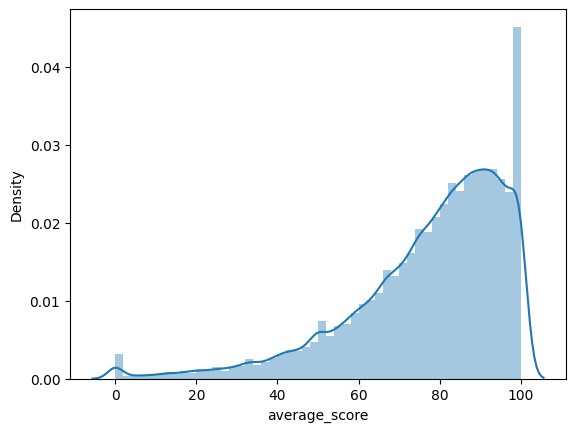

In [36]:
sns.distplot(df['average_score'])

(array([ 1139.,   908.,  1514.,  2613.,  4641.,  8539., 14018., 21844.,
        30224., 36060.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

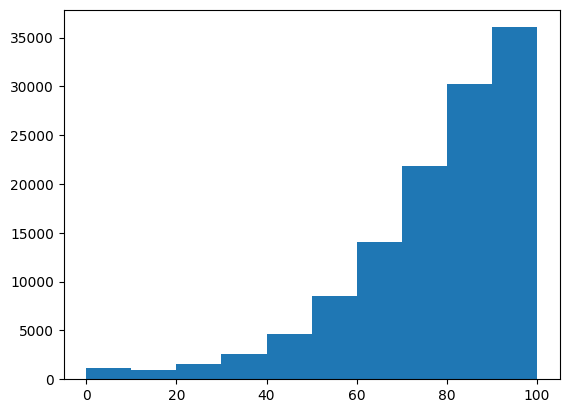

In [35]:
plt.hist(df['average_score'])

In [13]:
df_num.mode()

,task_class,average_score,homework_done,nps_score,add_homework_done
0,5.0,100.0,1,10.0,0


In [14]:
df.head()

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


In [34]:
out='average_score'
# Calculate the IQR
Q1 = df_num[out].quantile(0.25)
Q3 = df_num[out].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
outliers = (df_num[out] < (Q1 - 1.5 * IQR)) | (df_num[out] > (Q3 + 1.5 * IQR))

# Print the outliers
df[outliers][[out]].sort_values(out)

,average_score
61324,0.000000
55373,0.000000
55040,0.000000
54242,0.000000
54214,0.000000
...,...
15736,32.666667
26607,32.666667
29995,32.666667
33948,32.700000


Outliers can have a significant impact on statistical measures such as the <b> mean and standard deviation</b>, and can also affect the accuracy of models that are based on the data. Therefore, it's important to carefully consider the nature and potential impact of outliers in the data and to take appropriate steps to handle them, such as removing them or using robust statistical methods that are less sensitive to outliers.

Outliers:
1. homework_done all 10024 outliers more than average much -> outliers vs no outliers? ( dataset)
2. average_score all 4143 rows less than average much -> std high 

In [16]:
df_num.describe()

,task_class,average_score,homework_done,nps_score,add_homework_done
count,123212.000000,121500.000000,124517.000000,275.000000,124517.000000
mean,6.756834,77.226118,3.513962,6.803636,0.127204
std,1.733687,19.204706,10.350490,3.764702,9.483324
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,68.000000,1.000000,2.000000,0.000000
50%,7.000000,82.000000,2.000000,9.000000,0.000000
75%,8.000000,91.500000,4.000000,10.000000,0.000000
max,11.000000,100.000000,2275.000000,10.000000,2242.000000


<AxesSubplot: >

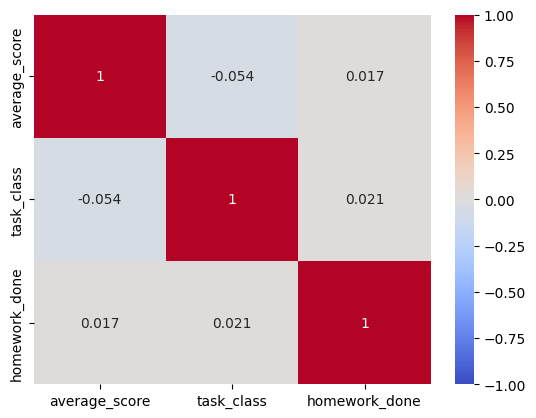

In [42]:
# Perform a correlation analysis between two relevant variables of your choice. Briefly explain your findings.
df_eff=df[['average_score','task_class','homework_done']].corr()
sns.heatmap(df_eff, cmap='coolwarm',vmin=-1, vmax=1, annot=True )
# surprisingly weak correlation -> is this because of outliers? 

In [18]:
df_num.corr() #surpringly weak correkation between numerical variables

,task_class,average_score,homework_done,nps_score,add_homework_done
task_class,1.000000,-0.054432,0.021437,-0.217210,0.000240
average_score,-0.054432,1.000000,0.017126,-0.069820,-0.006410
homework_done,0.021437,0.017126,1.000000,0.142087,0.934652
nps_score,-0.217210,-0.069820,0.142087,1.000000,0.138637
add_homework_done,0.000240,-0.006410,0.934652,0.138637,1.000000


### Part 2: Data Visualization (25 minutes)
Using the dataset provided, create two visualizations that effectively communicate important
insights:
Choose a suitable chart type to show the distribution of a selected variable. Create a visualization
that compares two or more variables. Note: You may use any data visualization tool or library you
are comfortable with, such as Excel, Google Sheets, Tableau, or Python libraries like Matplotlib
or Seaborn.

### Part 3: Communication (30 minutes)
Imagine you are presenting your findings to non-technical stakeholders. Write a short summary
(around 200 words) explaining your insights from the data analysis and visualizations. Ensure your
explanation is clear, concise, and accessible for a non-technical audience.
When you have completed the test, please submit your answers, calculations, visualizations, and
summary in a single document by email to: sang@coderschool.vn and phuc.vo@coderschool.vn.
Please do note a rough estimate of how much time you have spent on the assignment.